In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import signal
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import random

In [2]:
data = pd.read_csv('emotions.csv')

In [3]:
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [4]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].map(label_mapping)

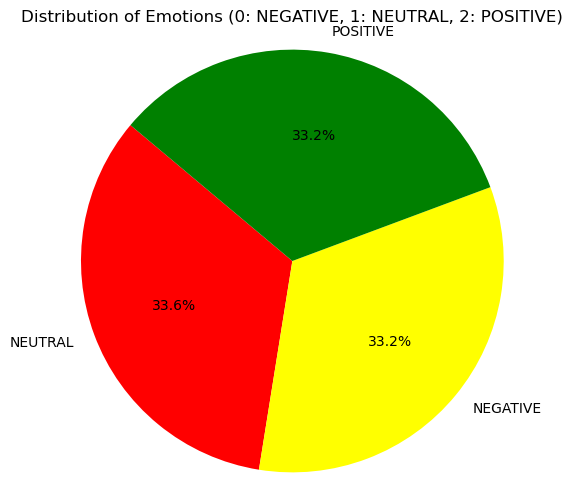

In [5]:
counts = data['label'].value_counts()
labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
labels = [labels[label] for label in counts.index]

# pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['red', 'yellow', 'green'])
plt.title("Distribution of Emotions (0: NEGATIVE, 1: NEUTRAL, 2: POSITIVE)")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

plt.show()

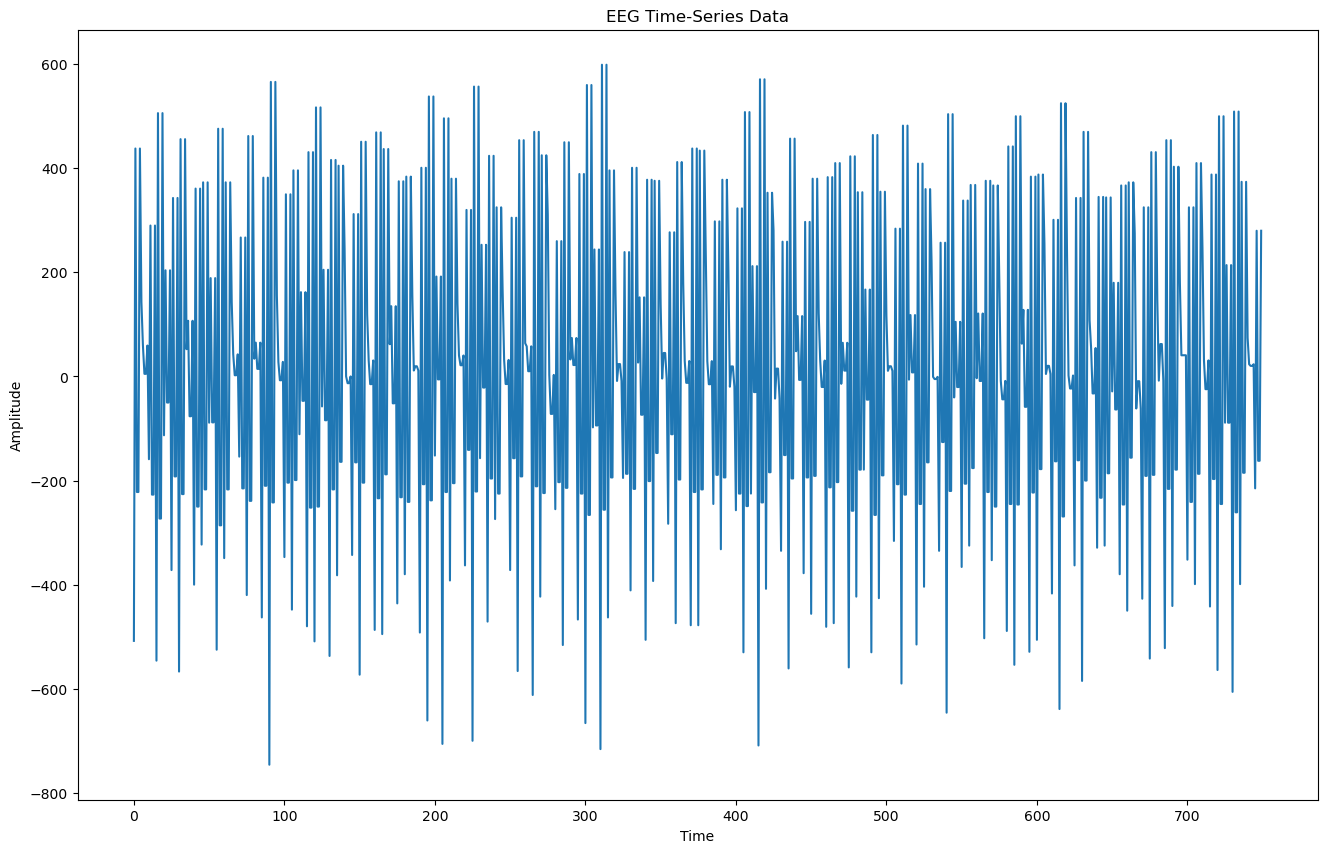

In [6]:
sample_dt = data.loc[0, 'fft_0_b':'fft_749_b']
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_dt)), sample_dt)
plt.title("EEG Time-Series Data")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

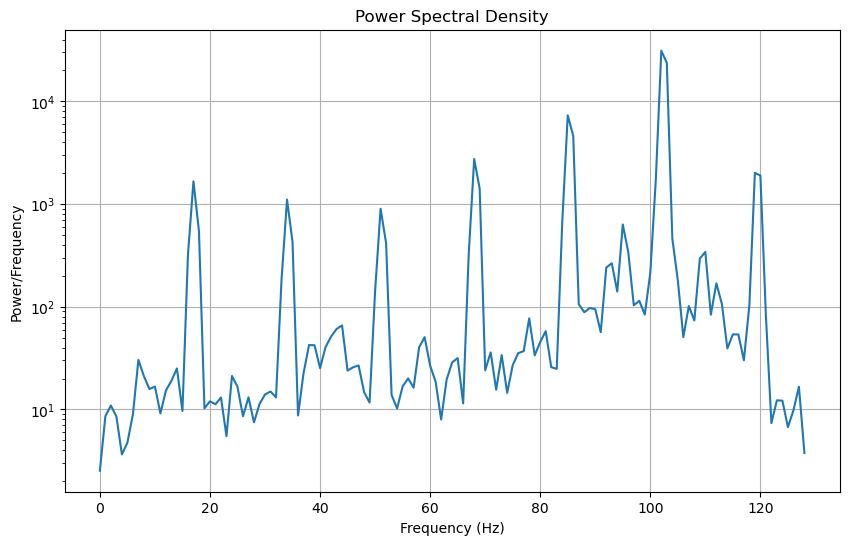

In [7]:
sampling_rate = 256 

# Spectral Analysis
frequencies, power_density = signal.welch(sample_dt, fs=sampling_rate)
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, power_density)
plt.title("Power Spectral Density")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power/Frequency")
plt.grid()
plt.show()

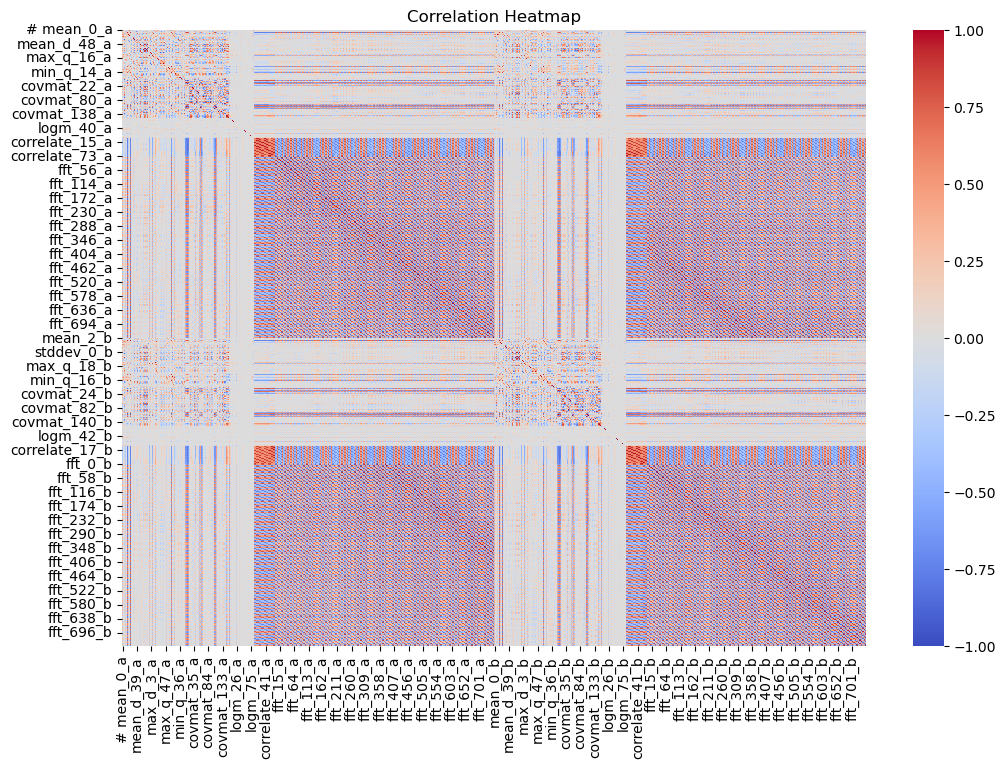

In [8]:
correlation_matrix = data.drop('label', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

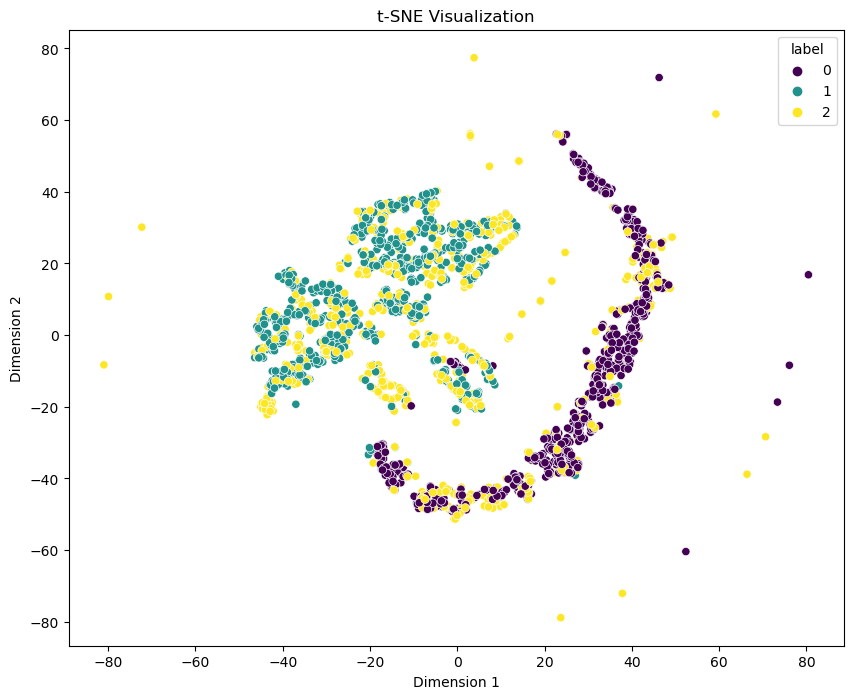

In [9]:
# t-SNE Visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data.drop('label', axis=1))
tsne_df = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
tsne_df['label'] = data['label']
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='label', data=tsne_df, palette='viridis')
plt.title("t-SNE Visualization")
plt.show()

In [10]:
emotions = data['label'].unique()
emotions

array([0, 1, 2], dtype=int64)

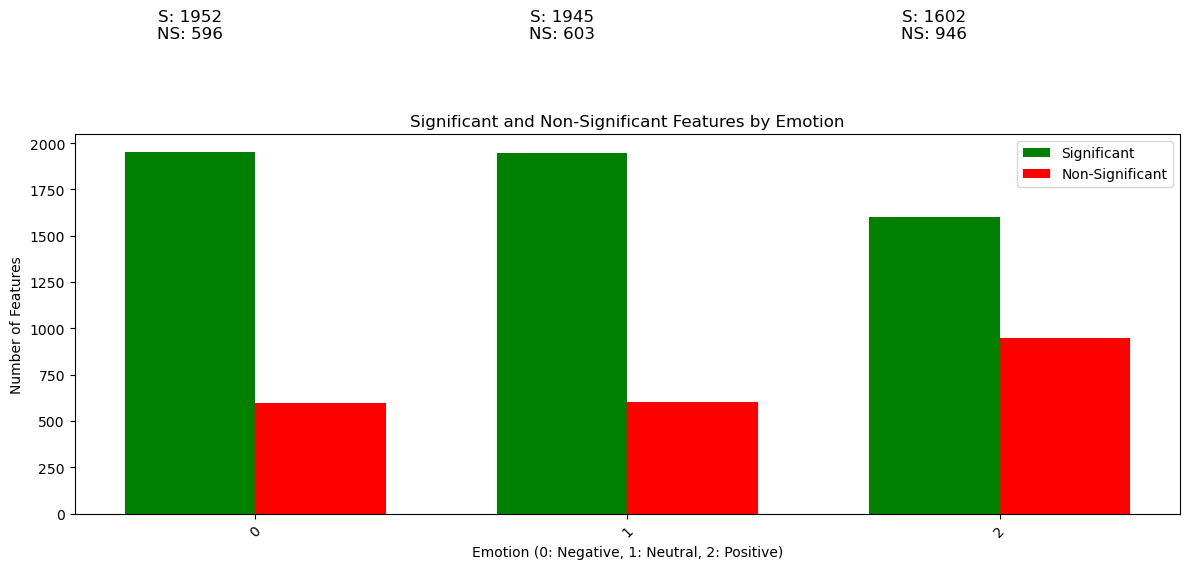

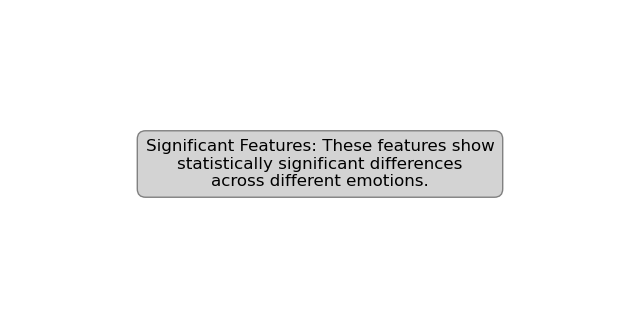

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Define colors for significant and non-significant features
significant_color = 'green'
non_significant_color = 'red'

# Create a dictionary to store the number of significant and non-significant features for each emotion
num_features = {emotion: {'significant': 0, 'non-significant': 0} for emotion in emotions}

# Perform t-tests and count significant features for each emotion
for emotion in emotions:
    subset = data[data['label'] == emotion]
    for feature in data.columns[:-1]:
        _, p_value = ttest_ind(subset[feature], data[feature])
        if p_value < 0.05:
            num_features[emotion]['significant'] += 1
        else:
            num_features[emotion]['non-significant'] += 1

# Extract emotion labels and corresponding feature counts
emotion_labels = list(num_features.keys())
significant_counts = [num_features[emotion]['significant'] for emotion in emotion_labels]
non_significant_counts = [num_features[emotion]['non-significant'] for emotion in emotion_labels]

# Create a bar chart to visualize the number of significant and non-significant features for each emotion
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(emotion_labels))

plt.bar(index, significant_counts, bar_width, label='Significant', color=significant_color)
plt.bar(index + bar_width, non_significant_counts, bar_width, label='Non-Significant', color=non_significant_color)

# Add labels and title
plt.xlabel('Emotion (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Number of Features')
plt.title('Significant and Non-Significant Features by Emotion')
plt.xticks(index + bar_width / 2, emotion_labels)
plt.legend()

# Display the counts above the bars
for i, (significant_count, non_significant_count) in enumerate(zip(significant_counts, non_significant_counts)):
    plt.text(i, significant_count + non_significant_count + 1, f'S: {significant_count}\nNS: {non_significant_count}', ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()

# Explanation for significant features
plt.figure(figsize=(8, 4))
plt.text(0.5, 0.5, 'Significant Features: These features show\nstatistically significant differences\nacross different emotions.',
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='lightgray', edgecolor='gray', boxstyle='round,pad=0.5'))
plt.axis('off')

plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [13]:
#model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=70, batch_size=32, verbose=2)

Epoch 1/70
38/38 - 1s - loss: 1.2340 - accuracy: 0.7569 - val_loss: 0.4262 - val_accuracy: 0.9231 - 1s/epoch - 31ms/step
Epoch 2/70
38/38 - 0s - loss: 0.7250 - accuracy: 0.8659 - val_loss: 0.6469 - val_accuracy: 0.8930 - 198ms/epoch - 5ms/step
Epoch 3/70
38/38 - 0s - loss: 0.5088 - accuracy: 0.8885 - val_loss: 0.3332 - val_accuracy: 0.9164 - 204ms/epoch - 5ms/step
Epoch 4/70
38/38 - 0s - loss: 0.3646 - accuracy: 0.9028 - val_loss: 0.3312 - val_accuracy: 0.9097 - 232ms/epoch - 6ms/step
Epoch 5/70
38/38 - 0s - loss: 0.4659 - accuracy: 0.9086 - val_loss: 0.2110 - val_accuracy: 0.9130 - 245ms/epoch - 6ms/step
Epoch 6/70
38/38 - 0s - loss: 0.2876 - accuracy: 0.9120 - val_loss: 0.2356 - val_accuracy: 0.9331 - 217ms/epoch - 6ms/step
Epoch 7/70
38/38 - 0s - loss: 0.2776 - accuracy: 0.9279 - val_loss: 0.2337 - val_accuracy: 0.9331 - 257ms/epoch - 7ms/step
Epoch 8/70
38/38 - 0s - loss: 0.2220 - accuracy: 0.9271 - val_loss: 0.2764 - val_accuracy: 0.9264 - 248ms/epoch - 7ms/step
Epoch 9/70
38/38 -

Epoch 68/70
38/38 - 0s - loss: 0.0531 - accuracy: 0.9883 - val_loss: 0.3241 - val_accuracy: 0.9732 - 199ms/epoch - 5ms/step
Epoch 69/70
38/38 - 0s - loss: 0.0185 - accuracy: 0.9908 - val_loss: 0.4358 - val_accuracy: 0.9599 - 203ms/epoch - 5ms/step
Epoch 70/70
38/38 - 0s - loss: 0.0256 - accuracy: 0.9941 - val_loss: 0.3854 - val_accuracy: 0.9732 - 212ms/epoch - 6ms/step


In [16]:
model_acc = model.evaluate(X_test, y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

y_pred = np.argmax(model.predict(X_test), axis=-1)

Test Accuracy: 96.875%
20/20 [==============================] - 0s 2ms/step


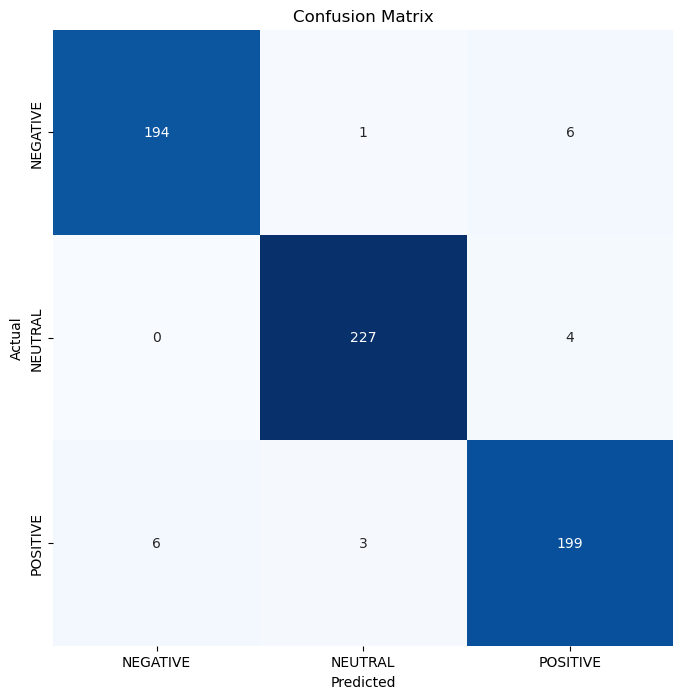

In [17]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())
# Visualization of Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=label_mapping.keys(), yticklabels=label_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [18]:
#Classification Report
print("Classification Report:\n", clr)

Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.97      0.97      0.97       201
     NEUTRAL       0.98      0.98      0.98       231
    POSITIVE       0.95      0.96      0.95       208

    accuracy                           0.97       640
   macro avg       0.97      0.97      0.97       640
weighted avg       0.97      0.97      0.97       640



In [19]:
#Inference
import random
emotion_labels = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}
for i in range(6, 8):
    random_index = random.randint(0, len(X_test) - 1)
    sample_input = X_test.iloc[random_index].values.reshape(1, -1)
    true_label = y_test.iloc[random_index]
    true_emotion = emotion_labels.get(true_label, 'Unknown')  # Use .get() to avoid KeyError

    # Predict emotion for the sample input`
    predicted_emotion = model.predict(sample_input)
    predicted_label = emotion_labels[np.argmax(predicted_emotion)]
print(f"Sample {i}: Real Emotion Label: {true_emotion}, Predicted Emotion Label: {predicted_label}")

1/1 [==============================] - 0s 42ms/step
Sample 7: Real Emotion Label: NEGATIVE, Predicted Emotion Label: NEGATIVE
